Dataset Columns:
price: The selling price of the house. This is likely the target variable, and it is a numerical value representing the cost of the property in a specific currency (possibly Indian Rupees, based on the large numbers, but this would need confirmation).

area: The total area of the house in square feet (or another unit). Larger houses generally cost more, so this column represents a significant feature in predicting house prices.

bedrooms: The number of bedrooms in the house. More bedrooms typically increase the value of a property.

bathrooms: The number of bathrooms in the house. Like bedrooms, a higher number of bathrooms can raise the property's value.

stories: The number of floors (stories) in the house. A house with more stories may have a larger total area, influencing the price.

mainroad: A binary variable (yes/no) indicating whether the house is located near a main road. Proximity to a main road can either increase the price (due to accessibility) or decrease it (due to noise or pollution).

guestroom: A binary variable (yes/no) indicating whether the house has a guestroom. Houses with additional guestrooms may have a higher value.

basement: A binary variable (yes/no) indicating the presence of a basement in the house. Basements are often considered an additional space for living or storage and can affect the house price.

hotwaterheating: A binary variable (yes/no) indicating if the house has a hot water heating system. Houses with modern amenities such as hot water heating are often more expensive.

airconditioning: A binary variable (yes/no) indicating whether the house is equipped with air conditioning. Air conditioning can be an important feature in determining house prices, especially in warmer climates.

parking: The number of parking spaces available with the house. More parking spaces can add to the house's value.

prefarea: A binary variable (yes/no) indicating whether the house is in a preferred area (perhaps a more desirable neighborhood). Location is one of the biggest factors influencing house prices.

furnishingstatus: This is a categorical variable with three levels: "furnished," "semi-furnished," and "unfurnished." The level of furnishing can significantly affect the price of the house, with fully furnished houses generally costing more.

In [ ]:
install.packages("ggplot2")
install.packages("cowplot")
install.packages("plotly")
install.packages("GGally")
install.packages("reshape2")
library(ggplot2)
library(cowplot)
library(plotly)
library(GGally)
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cards’, ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
housing_data <- read.csv("/content/Housing.csv", stringsAsFactors = TRUE)

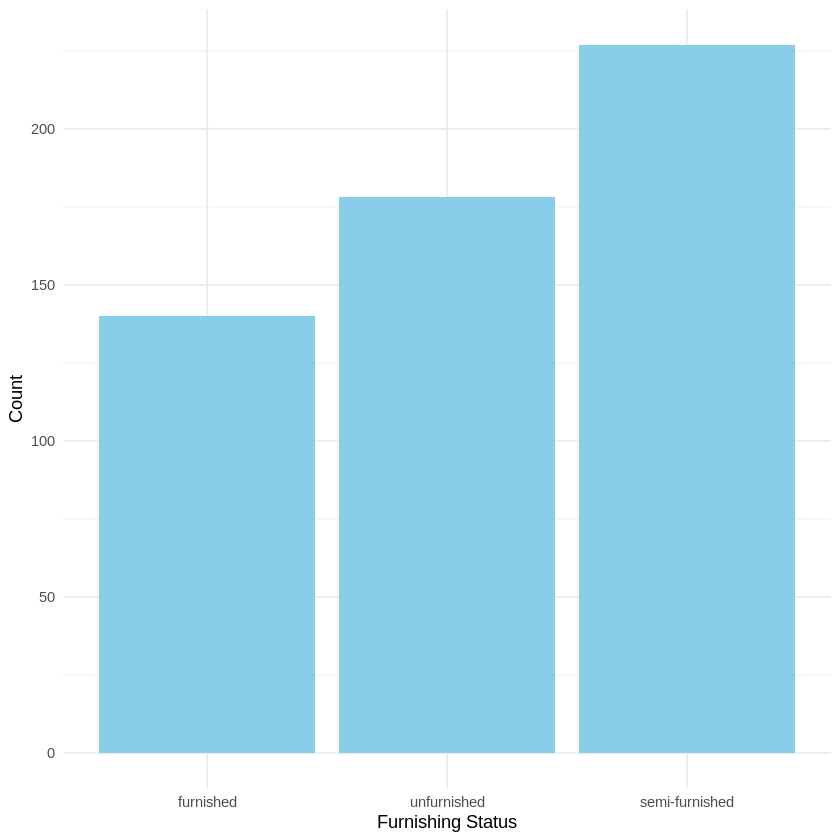

In [12]:
# Word chart for 'furnishingstatus'
furnishing_data <- as.data.frame(table(housing_data$furnishingstatus))
ggplot(furnishing_data, aes(x = reorder(Var1, Freq), y = Freq)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  xlab("Furnishing Status") +
  ylab("Count") +
  theme_minimal()


Observations:
Furnishing Status Distribution:

The highest number of houses are semi-furnished, with just over 200 houses in this category.
Unfurnished houses come next, with a count between 150 and 200.
Furnished houses are the least common, with a count around 150.
Key Insight:

There is a clear preference for semi-furnished houses, followed by unfurnished and then furnished houses. This may indicate that buyers or sellers in this housing market prefer semi-furnished properties, likely due to a balance between affordability and convenience.

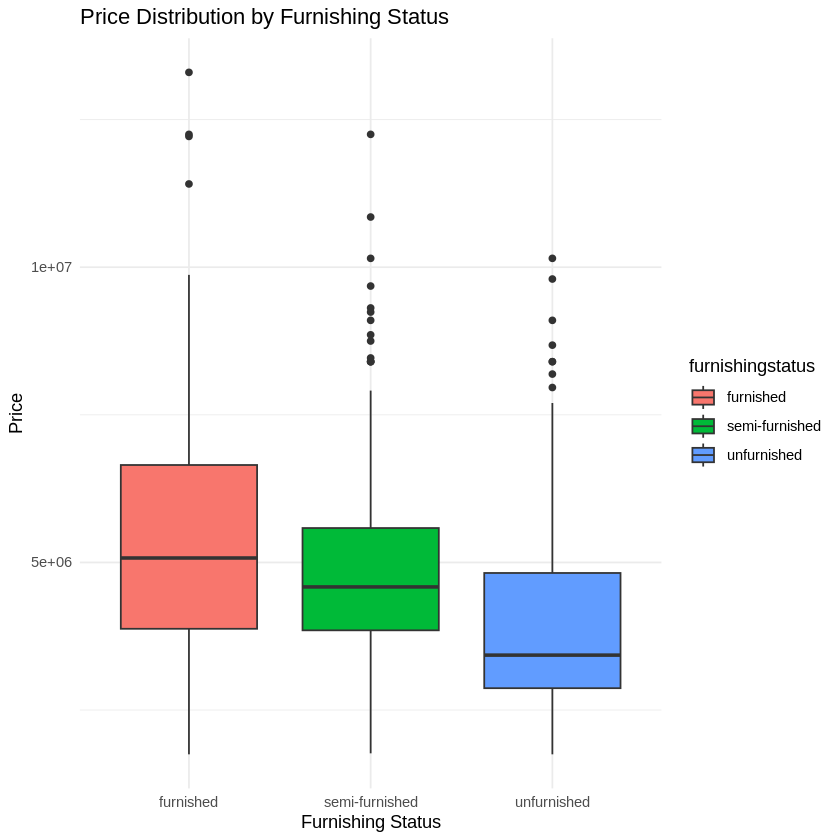

In [13]:
# Box plot for 'price' distribution based on 'furnishingstatus'
ggplot(housing_data, aes(x=furnishingstatus, y=price, fill=furnishingstatus)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title="Price Distribution by Furnishing Status", x="Furnishing Status", y="Price")


Observations:
Price Range Distribution:

Furnished houses tend to have the highest median price among the three categories. The interquartile range (IQR) is wide, indicating significant variability in prices.
Semi-furnished houses have a lower median price than furnished houses but have a wider range, showing a high number of price outliers.
Unfurnished houses have the lowest median price and the most compact IQR, meaning there is less variation in their prices.
Outliers:

All three categories have a significant number of outliers, with some houses priced much higher than the bulk of the data.
Semi-furnished houses have more pronounced outliers at the higher price end, suggesting that some high-end semi-furnished properties exist in the dataset.
General Trend:

Furnished properties are priced higher overall, likely reflecting the added value of furnishing.
Semi-furnished homes have more price diversity, with several high-end outliers, but their median price is still lower than fully furnished homes.
Unfurnished homes are generally the most affordable, with fewer high-priced outliers.
Key Insight:
Furnishing status significantly impacts house prices, with furnished homes commanding a higher price on average. However, semi-furnished homes show a broader range of prices, possibly due to variations in how "semi-furnished" is defined in different properties. Unfurnished homes remain the most cost-effective, but there are fewer outliers in this category.

This chart provides useful insights for pricing strategies in the housing market based on furnishing status.

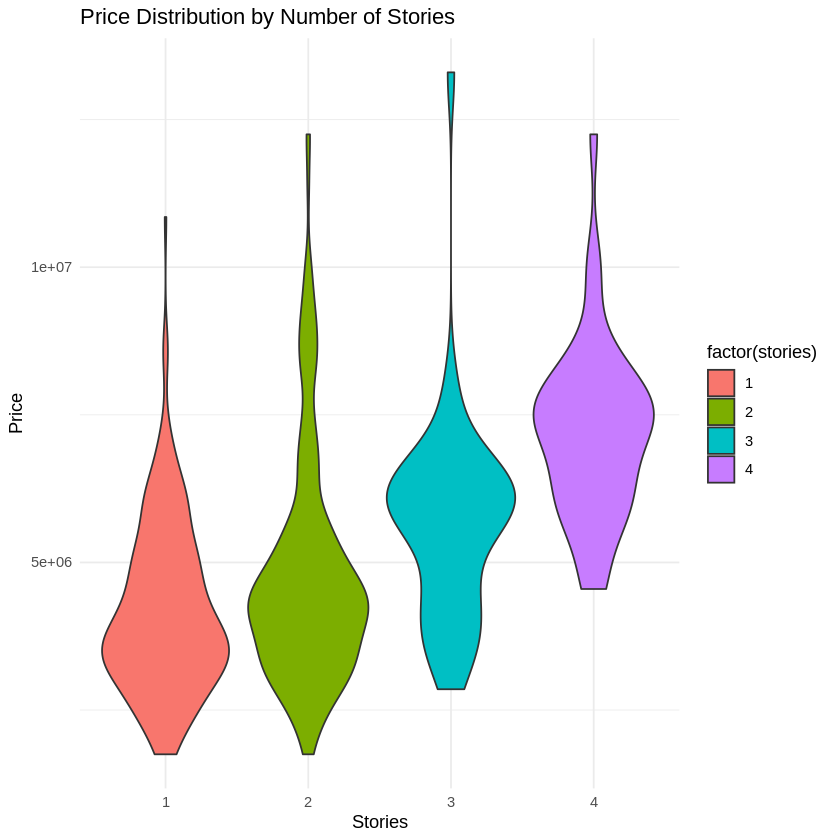

In [14]:
# Violin plot to visualize price distribution by 'stories'
ggplot(housing_data, aes(x=factor(stories), y=price, fill=factor(stories))) +
  geom_violin() +
  theme_minimal() +
  labs(title="Price Distribution by Number of Stories", x="Stories", y="Price")


Observations:
Price Distribution for 1-Story Buildings (Red):
The distribution is relatively wide, indicating a larger range of prices.
There is a noticeable concentration around the lower price range, but prices extend to very high values as well.
Price Distribution for 2-Story Buildings (Green):
The range of prices is tighter compared to 1-story buildings.
The distribution is narrower, suggesting more consistency in price levels.
Price Distribution for 3-Story Buildings (Cyan):
Prices for 3-story buildings seem to have a more uniform distribution.
There is a slight peak near the lower price range, but prices remain more evenly spread.
Price Distribution for 4-Story Buildings (Purple):
The distribution is wider than that for 2-story or 3-story buildings, similar to 1-story.
The prices span a wide range, with some clustering around the middle price range.
Insights:
Higher Price Variation for 1- and 4-Story Buildings: Both 1-story and 4-story buildings show a wider price range, indicating a greater variation in their pricing. This could be due to a mix of luxury or premium options as well as budget-friendly ones in these categories.
More Consistent Pricing for 2- and 3-Story Buildings: The price distributions for 2- and 3-story buildings are more consistent, suggesting these may be more standardized in terms of construction or market pricing.
Potential for Higher Prices in Larger Buildings: While the range of prices remains similar across different building types, larger buildings (4 stories) may skew towards higher price points.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


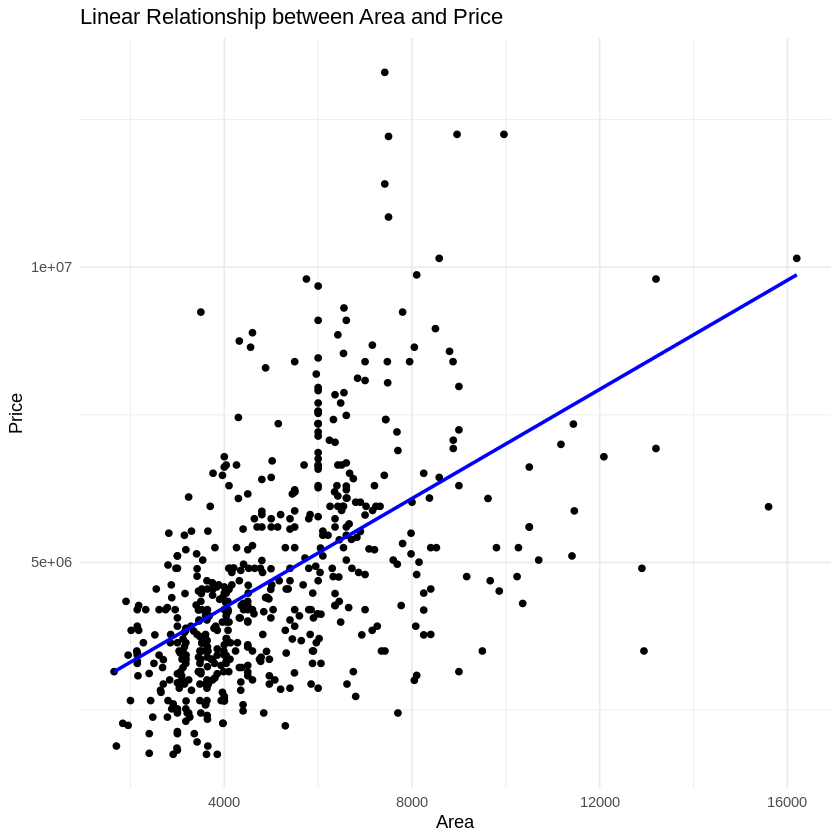

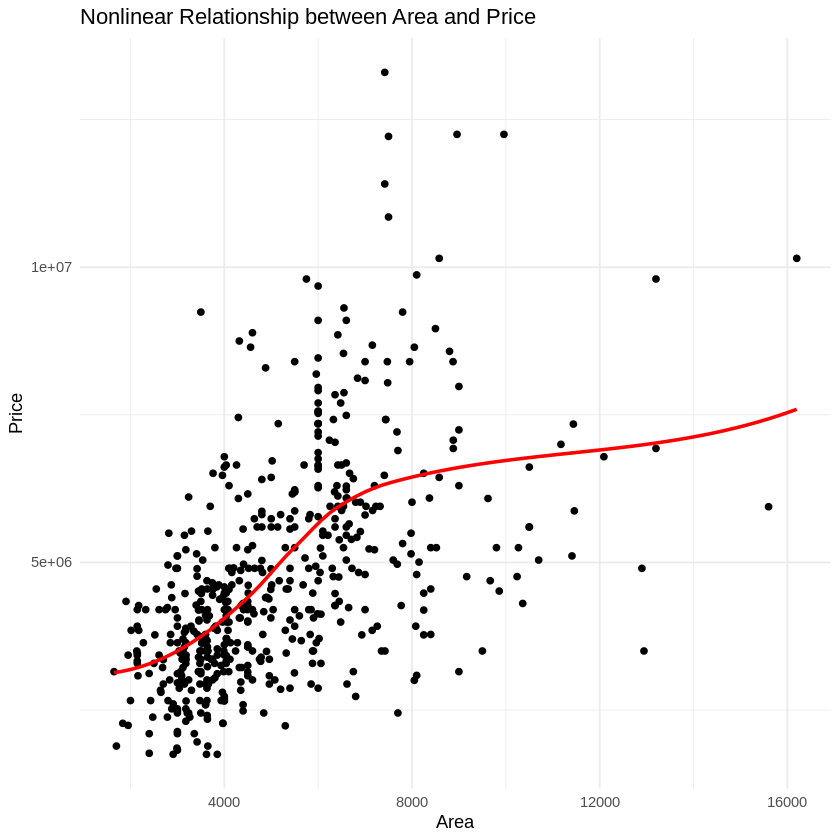

In [15]:
# Linear regression plot
ggplot(housing_data, aes(x=area, y=price)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE, color="blue") +
  theme_minimal() +
  labs(title="Linear Relationship between Area and Price", x="Area", y="Price")

# Nonlinear regression using loess
ggplot(housing_data, aes(x=area, y=price)) +
  geom_point() +
  geom_smooth(method="loess", se=FALSE, color="red") +
  theme_minimal() +
  labs(title="Nonlinear Relationship between Area and Price", x="Area", y="Price")


**First Plot (Linear Relationship)**
Linear Fit: The blue line shows a linear regression fit between "Area" and "Price."

**Key Observations:**
There is a positive correlation between area and price; as the area increases, the price tends to increase.
The scatter of data points indicates that although there is an overall upward trend, the relationship is not tightly linear. The data points are widely spread around the line, especially for larger areas.
The linear model may not capture all the variations, particularly at higher areas where the prices show more spread.
Second Plot (Nonlinear Relationship)
Nonlinear Fit: The red line shows a nonlinear regression fit (perhaps a polynomial or LOESS curve) between "Area" and "Price."

**Key Observations:**
The nonlinear model better captures the underlying trend, especially for areas between 4000 and 8000. In this range, the relationship between area and price becomes more apparent as slightly exponential.
For smaller areas (less than 4000), the prices grow steadily, but as the area increases, the price grows at a faster rate, indicating a more exponential relationship.
Beyond 10,000 in area, the increase in price becomes more gradual, suggesting diminishing returns with further increases in area.

**Comparison & Insights:**
Linear Model: While the linear model shows a positive relationship, it doesn't capture the finer trends seen in the data, especially for larger properties where price variability increases.
Nonlinear Model: The nonlinear fit is more accurate for this dataset. It highlights that price increases aren't strictly proportional to area. Instead, prices rise faster with increasing area up to a certain point, and then the rate of price increase slows down.
Recommendation: For predicting prices based on area, a nonlinear model will likely provide more accurate results than a linear model due to the varying price behavior at different levels of area.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



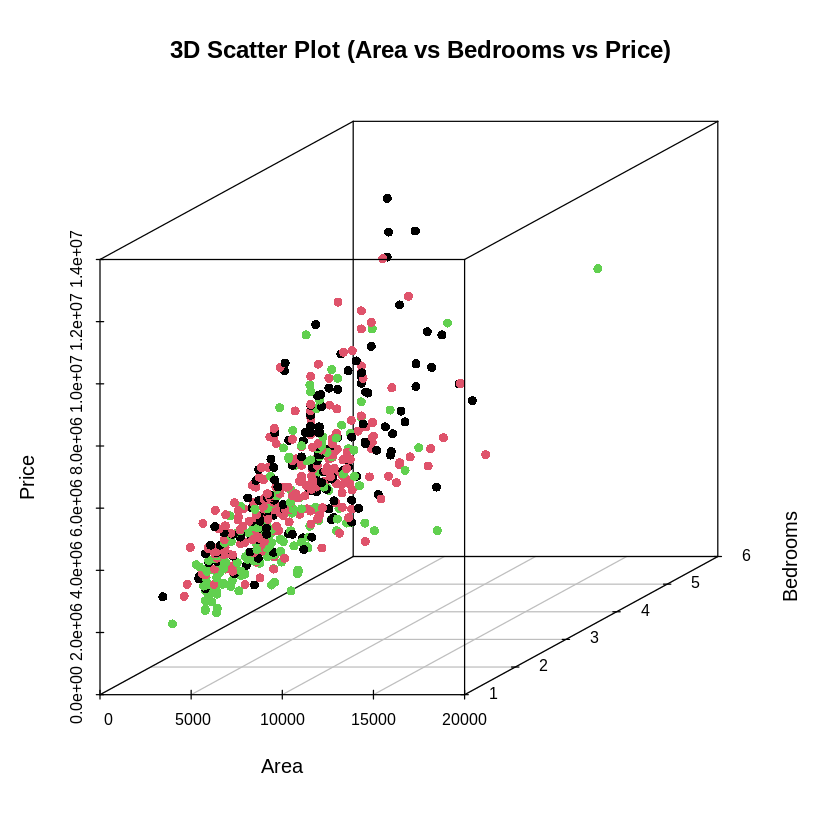

In [19]:
install.packages("scatterplot3d")

# Load libraries
library(scatterplot3d)
# Basic 3D scatter plot with scatterplot3d in Colab
scatterplot3d(housing_data$area,
              housing_data$bedrooms,
              housing_data$price,
              color = as.numeric(as.factor(housing_data$furnishingstatus)),  # Color by furnishing status
              pch = 16,                 # Point type
              xlab = "Area",
              ylab = "Bedrooms",
              zlab = "Price",
              main = "3D Scatter Plot (Area vs Bedrooms vs Price)")


Observations:
General Trends:

Area vs. Price: As the area of a property increases, prices generally increase as well, consistent with the linear and nonlinear trends shown in your earlier plots.
Bedrooms vs. Price: Properties with more bedrooms tend to be priced higher, although there may be some variability depending on other factors such as area and furnishing status.
Clustering Based on Furnishing Status:

Since the color in your plot corresponds to furnishing status, you might notice that properties with different furnishing statuses (e.g., furnished, semi-furnished, unfurnished) are clustered in different parts of the graph.
Furnished Properties: These might cluster toward higher price points regardless of area or bedroom count, indicating a price premium for furnished properties.
Unfurnished Properties: These might generally occupy lower price segments, even if they have larger areas or more bedrooms.
Price Behavior for Larger Areas:

For properties with a higher number of bedrooms and larger areas, prices might increase more rapidly, forming a visible trend in the 3D space. However, there could also be diminishing returns in some regions where increasing area or bedrooms doesn’t result in significant price increases.
Bedroom and Area Correlation:

You might observe whether properties with more bedrooms also tend to have larger areas. Typically, this is expected, but some properties could have a high bedroom count with relatively smaller areas, affecting their price.
Insights:
Furnishing Status Impact: Furnishing status likely plays a significant role in determining prices, as visualized by the color coding. Furnished properties are generally more expensive compared to unfurnished ones, and this could be a key factor to consider when analyzing property prices.

Price and Area Relationship: Similar to your previous plots, the relationship between area and price is positive, but now you also see how the number of bedrooms interacts with these two variables. A large area with fewer bedrooms might still command a high price, possibly due to luxury factors or location.

High Price Properties: You may notice some properties priced significantly higher than the rest for a given area and bedroom count, possibly indicating high-end or luxury properties with additional features beyond basic size and number of rooms (e.g., better furnishing, location advantages).

Price Distribution in 3D: The 3D scatter plot offers a comprehensive way to view how area, bedrooms, and furnishing status together influence price. It's likely that price increases as both area and bedroom count rise, but the exact rate of increase may vary based on additional factors like furnishing.

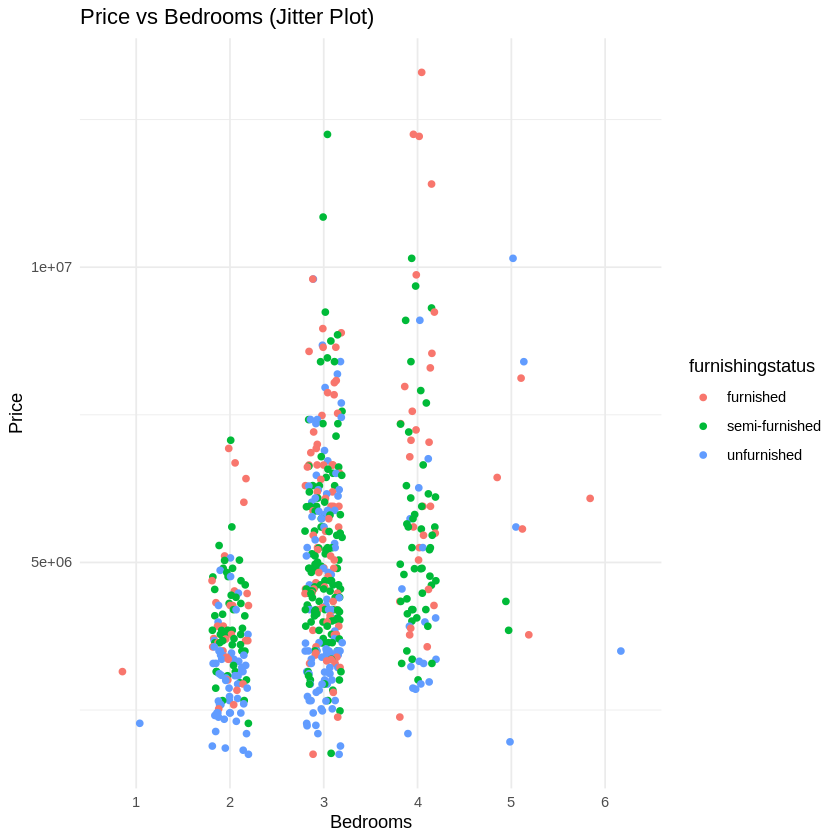

In [17]:
# Jitter plot for 'bedrooms' vs 'price'
ggplot(housing_data, aes(x=factor(bedrooms), y=price, color=furnishingstatus)) +
  geom_jitter(width = 0.2) +
  theme_minimal() +
  labs(title="Price vs Bedrooms (Jitter Plot)", x="Bedrooms", y="Price")


Observations:
Distribution of Prices for Different Bedroom Counts:

Each jitter point represents a property, and the width adjustment (width = 0.2) ensures points don't overlap, making it easier to see price distribution for each bedroom count.
Properties with the same number of bedrooms could vary significantly in price, which will be shown by the vertical spread of points.
Impact of Furnishing Status:

Different colors correspond to different furnishing statuses. This allows you to observe whether furnishing status plays a role in price variation across properties with the same bedroom count.
For each bedroom category, you might see clustering by color, where certain furnishing statuses dominate higher or lower price ranges.
Price Variability for Lower Bedroom Counts:

For properties with fewer bedrooms (e.g., 1 or 2), you might observe a broad range of prices, potentially due to other factors (e.g., area, location, furnishing) influencing the price.
Price Trends for Higher Bedroom Counts:

As the number of bedrooms increases, you might observe whether the prices consistently rise or if there is significant variability within the same bedroom category.
Insights:
Price Variation Within Each Bedroom Category:

There could be a large spread of prices within each bedroom count, especially for lower bedroom counts like 1 or 2 bedrooms. This indicates that factors other than just the number of bedrooms (such as area, furnishing status, or location) are influencing property prices.
For higher bedroom counts, price points might still vary but could show a more consistent trend of increasing prices.
Furnishing Status and Price:

The furnishing status may show a clear pattern: properties that are fully furnished could tend to occupy higher price ranges for each bedroom count. Unfurnished properties might cluster at lower price points.
This emphasizes the impact of furnishing on property prices, where buyers are likely to pay a premium for fully furnished homes.
Bedroom Count as a Price Factor:

The plot should confirm whether there is a positive correlation between the number of bedrooms and price, with higher bedroom counts generally commanding higher prices.
However, the wide spread in price for the same number of bedrooms indicates that bedroom count is not the only significant factor affecting property prices.
Outliers:

The jitter plot will also help identify any outliers — properties that are priced much higher or lower than others with the same number of bedrooms. These outliers may represent luxury or budget properties.